In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

df1 = pd.read_csv('mofs_bandgaps_hse.csv') 
df2 = pd.read_csv('bandgap_results.csv')  
merged_df = pd.merge(df1, df2, on='mof_name', how='inner', suffixes=('_hse', '_gfn1'))
df3 = pd.read_csv('mofs_bandgaps_pbe.csv') 
merged_df_all = pd.merge(merged_df, df3, on='mof_name', how='inner', suffixes=('_gfn1', '_pbe'))

x = merged_df['bandgap_hse'] 
y = merged_df['bandgap_gfn1']  

mae = mean_absolute_error(x, y)
print(f"MAE: {mae:.3f} eV")

difference = x - y  
error = np.abs(x-y)
fig, ax = plt.subplots(figsize=(8, 7))
plt.grid(True)
plt.hist(error,40,color='royalblue',alpha=0.5,  edgecolor='royalblue', linewidth=0.6)
plt.xlabel(r'$\Delta_{HSE-xTB} (eV)$ ', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.tight_layout()
plt.show()
fig.savefig('delta_hse_gfn.png',bbox_inches='tight', pad_inches=0.1, dpi=300)

/var/folders/hc/mkdm4b2n5zg_fps50qfnd1900000gp/T/ipykernel_26836/746672267.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


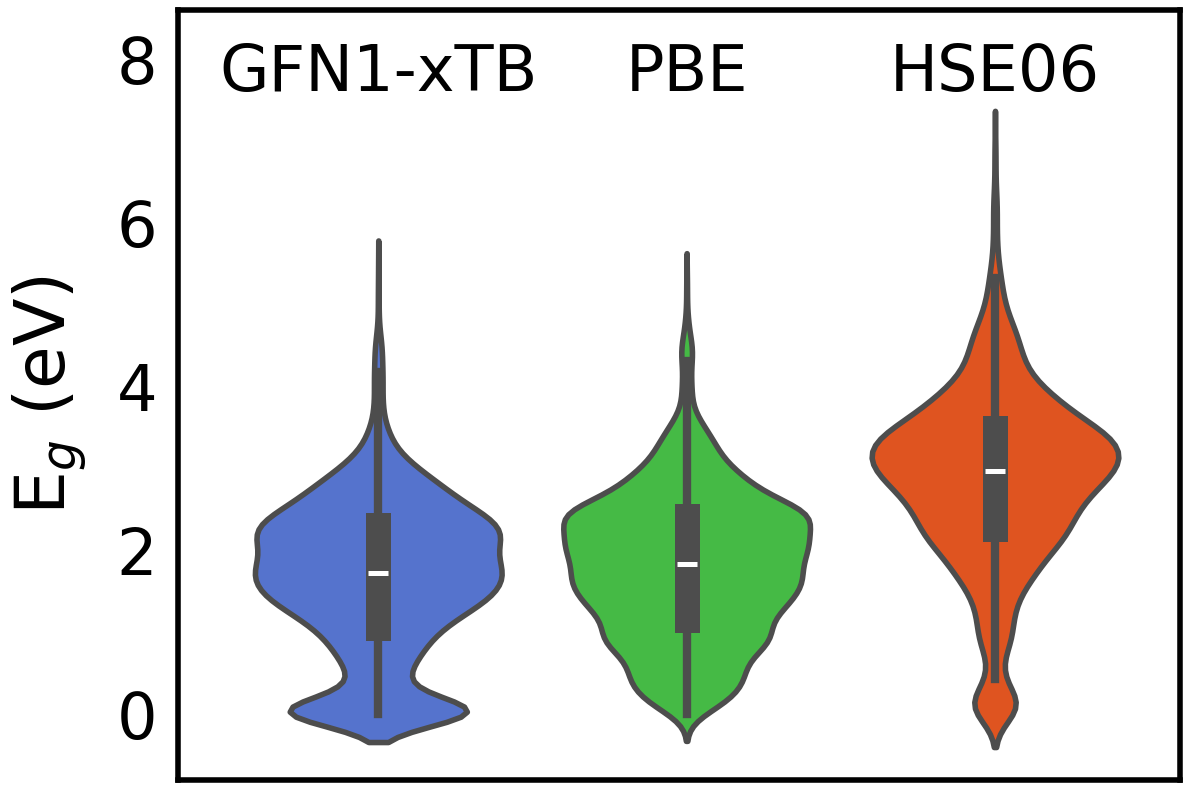

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

violin_data = pd.melt(
    merged_df_all,
    value_vars=['bandgap_gfn1', 'bandgap_pbe', 'bandgap_hse'],
    var_name='Method',
    value_name='Band Gap (eV)'
)

violin_data['Method'] = violin_data['Method'].replace({
    'bandgap_gfn1': 'GFN1-xTB',
    'bandgap_pbe': 'PBE',
    'bandgap_hse': 'HSE06'
})

plt.figure(figsize=(12, 8))
ax = sns.violinplot(
    data=violin_data,
    x='Method',
    y='Band Gap (eV)',
    inner='box',
    palette=['royalblue', 'limegreen', 'orangered'], linewidth=4
)

for spine in ax.spines.values():
    spine.set_linewidth(4)  # set thickness (e.g. 3)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x', which='both', length=0, direction='in', pad=-68, labelsize=50)
ax.tick_params(axis='y', which='both', length=0, direction='in', pad=15)
plt.ylim(-0.8,8.6)
plt.yticks([0,2,4,6,8],fontsize=46)
plt.xticks(fontsize=46)
plt.xlabel('')  # remove x label if any
plt.ylabel('E$_g$ (eV)', fontsize=50,labelpad=20)
ax.set_xlim(-0.65,2.6)
plt.tight_layout()
plt.savefig("bandgap_violinplot_all.png", dpi=300, bbox_inches='tight')
plt.show()

## HSE06

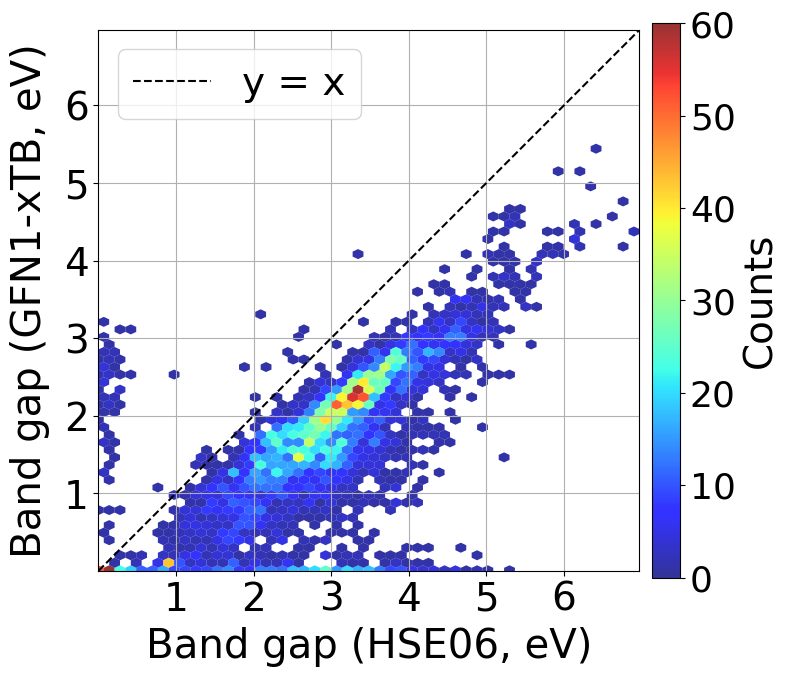

In [138]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))

hb = plt.hexbin(x, y, gridsize=50, cmap='jet', mincnt=1,alpha=0.8, edgecolors='none', vmin=0, vmax=60)

cb = fig.colorbar(hb, ax=ax, pad=0.02, shrink=0.765) 
cb.set_label('Counts', fontsize=28)
cb.ax.tick_params(labelsize=26) 
lims = [min(min(x), min(y)), max(max(x), max(y))]
plt.plot(lims, lims, 'k--', label='y = x')

plt.xlabel('Band gap (HSE06, eV)', fontsize=29,labelpad=6)
plt.ylabel('Band gap (GFN1-xTB, eV)', fontsize=29,labelpad=10)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlim(lims)
plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize=28)
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig('plot1b.png',bbox_inches='tight', pad_inches=0.1, dpi=300)

# PBE

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

df1 = pd.read_csv('mofs_bandgaps_hse.csv') 
df2 = pd.read_csv('mofs_bandgaps_pbe.csv')  
df3 = pd.read_csv('bandgap_results.csv')  
merged_df1 = pd.merge(df1, df2, on='mof_name', how='inner', suffixes=('_hse', '_pbe'))
merged_df = pd.merge(merged_df1, df3, on='mof_name', how='inner')

x = merged_df['bandgap_hse'] 
y = merged_df['bandgap_pbe']  
mae = mean_absolute_error(x, y)
print(f"MAE: {mae:.3f} eV")

MAE: 1.165 eV
MOFs with a bandgap difference greater than 0.2 eV:
0       qmof-0009829
1       qmof-000dce3
2       qmof-004080b
3       qmof-004947a
4       qmof-006f9b7
            ...     
4917    qmof-ffa7d7a
4918    qmof-ffe6994
4919    qmof-ffed86d
4920    qmof-fffd0e2
4921    qmof-fffeb7b
Name: mof_name, Length: 4854, dtype: object


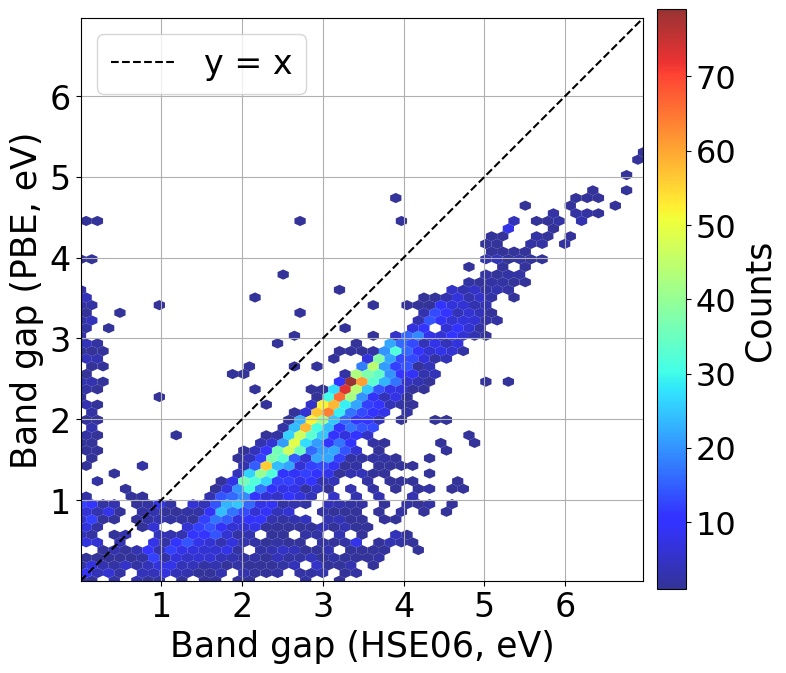

In [6]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))

hb = plt.hexbin(x, y, gridsize=50, cmap='jet', mincnt=1,alpha=0.8, edgecolors='none')

cb = fig.colorbar(hb, ax=ax, pad=0.02, shrink=0.785)  # 70% of default height
cb.set_label('Counts', fontsize=25)
cb.ax.tick_params(labelsize=23)  # colorbar ticks
lims = [min(min(x), min(y)), max(max(x), max(y))]
plt.plot(lims, lims, 'k--', label='y = x')

plt.xlabel('Band gap (HSE06, eV)', fontsize=25)
plt.ylabel('Band gap (PBE, eV)', fontsize=25)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.xlim(lims)
plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize=24)
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig('plot_sup1c.png',bbox_inches='tight', pad_inches=0.1, dpi=300)

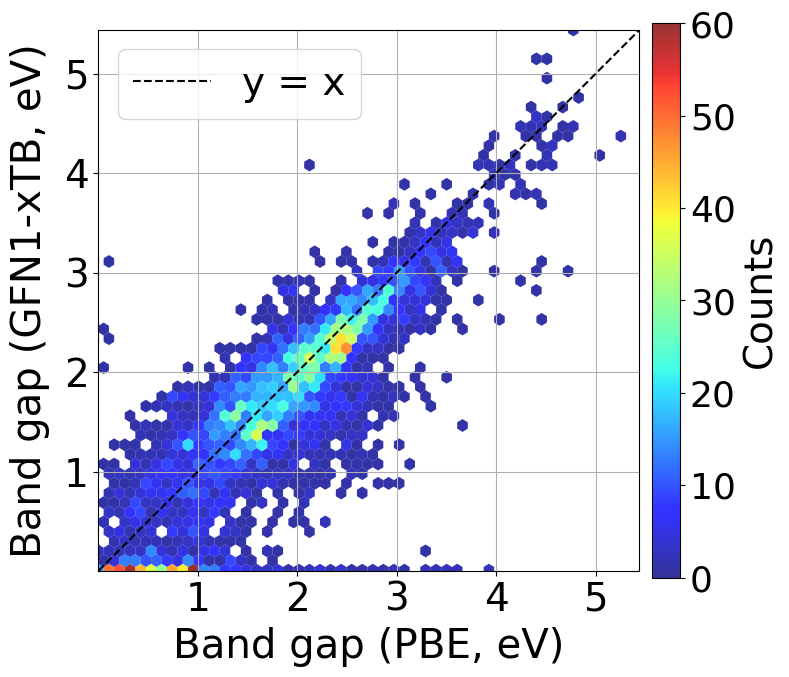

In [141]:
import numpy as np

fig, ax = plt.subplots(figsize=(8, 8))

hb = plt.hexbin(x, y, gridsize=50, cmap='jet', mincnt=1,alpha=0.8, edgecolors='none', vmin=0, vmax=60)

cb = fig.colorbar(hb, ax=ax, pad=0.02, shrink=0.765)  # 70% of default height
cb.set_label('Counts', fontsize=28)
cb.ax.tick_params(labelsize=26)  # colorbar ticks
lims = [min(min(x), min(y)), max(max(x), max(y))]
plt.plot(lims, lims, 'k--', label='y = x')

plt.xlabel('Band gap (PBE, eV)', fontsize=29,labelpad=6)
plt.ylabel('Band gap (GFN1-xTB, eV)', fontsize=29,labelpad=10)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlim(lims)
plt.ylim(lims)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(fontsize=28)
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig('plot1a.png',bbox_inches='tight', pad_inches=0.1, dpi=300)